In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [10]:
data_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [11]:
data_test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [12]:
data_train.GrLivArea.describe()

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64

(array([   5.,   11.,   13.,   61.,   58.,  126.,  165.,  180.,  122.,
         130.,  121.,   78.,   61.,   64.,   49.,   36.,   36.,   25.,
          13.,   25.,   16.,   11.,    4.,   11.,    9.,    5.,    4.,
           4.,    4.,    2.,    1.,    1.,    1.,    0.,    1.,    0.,
           2.,    0.,    1.,    0.,    2.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    2.]),
 array([  34900.,   49302.,   63704.,   78106.,   92508.,  106910.,
         121312.,  135714.,  150116.,  164518.,  178920.,  193322.,
         207724.,  222126.,  236528.,  250930.,  265332.,  279734.,
         294136.,  308538.,  322940.,  337342.,  351744.,  366146.,
         380548.,  394950.,  409352.,  423754.,  438156.,  452558.,
         466960.,  481362.,  495764.,  510166.,  524568.,  538970.,
         553372.,  567774.,  582176.,  596578.,  610980.,  625382.,
         639784.,  654186.,  668588.,  682990.,  697392.,  711794.,
         726196.,  740598.,  755000.]),
 <a list of 50 P

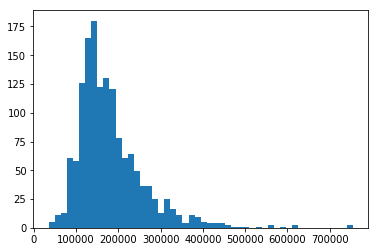

In [3]:
plt.hist(data_train.SalePrice, bins = 50)

(array([   2.,    2.,    1.,    0.,    0.,    0.,    2.,    3.,    4.,
           3.,    5.,    1.,    5.,   21.,   22.,   23.,   18.,   29.,
          58.,   56.,   65.,  100.,  122.,   93.,   90.,   82.,  108.,
          91.,   64.,   55.,   58.,   51.,   46.,   42.,   23.,   29.,
          22.,   13.,   13.,   13.,    7.,    5.,    4.,    1.,    2.,
           2.,    2.,    0.,    0.,    2.]),
 array([ 10.46024211,  10.52172673,  10.58321134,  10.64469596,
         10.70618058,  10.7676652 ,  10.82914982,  10.89063444,
         10.95211906,  11.01360367,  11.07508829,  11.13657291,
         11.19805753,  11.25954215,  11.32102677,  11.38251138,
         11.443996  ,  11.50548062,  11.56696524,  11.62844986,
         11.68993448,  11.75141909,  11.81290371,  11.87438833,
         11.93587295,  11.99735757,  12.05884219,  12.12032681,
         12.18181142,  12.24329604,  12.30478066,  12.36626528,
         12.4277499 ,  12.48923452,  12.55071913,  12.61220375,
         12.67368837,  1

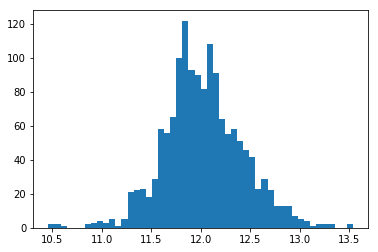

In [4]:
plt.hist(np.log(data_train.SalePrice), bins = 50)

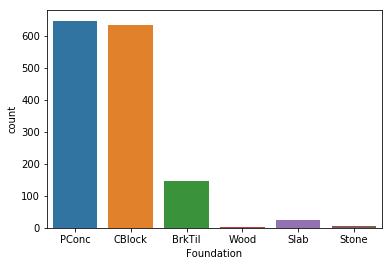

In [5]:
data_train.Foundation.value_counts()
sns.countplot(data_train.Foundation)

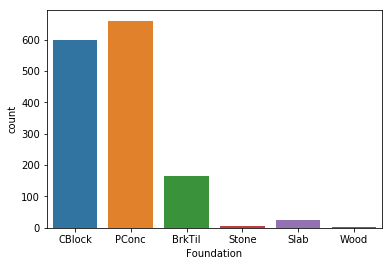

In [6]:
sns.countplot(data_test.Foundation)

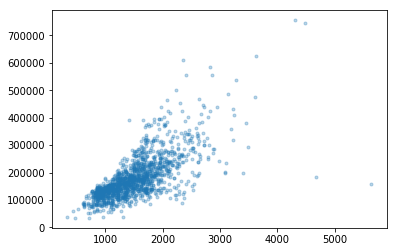

In [8]:
plt.plot(data_train.GrLivArea, data_train.SalePrice,
         '.', alpha = 0.3)

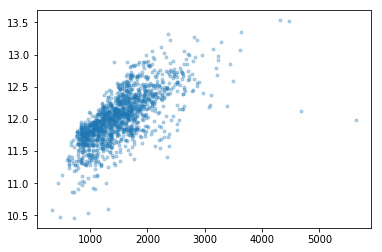

In [9]:
plt.plot(data_train.GrLivArea, np.log(data_train.SalePrice),
         '.', alpha = 0.3)

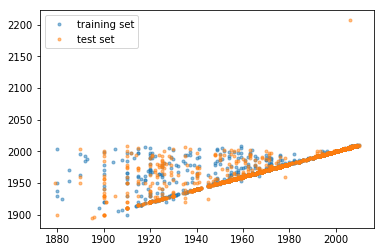

In [13]:
plt.plot(data_train.YearBuilt, data_train.GarageYrBlt,
         '.', alpha=0.5, label = 'training set')

plt.plot(data_test.YearBuilt, data_test.GarageYrBlt,
         '.', alpha=0.5, label = 'test set')

plt.legend()

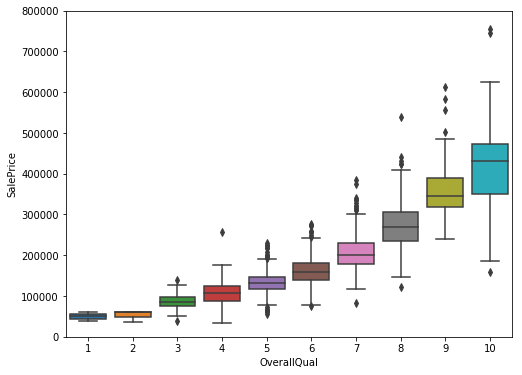

In [45]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([data_train['SalePrice'], data_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data_train)
fig.axis(ymin=0, ymax=800000);

In [20]:
Neighborhood_meanSP = data_train.groupby('Neighborhood')['SalePrice'].mean()

Neighborhood_meanSP = Neighborhood_meanSP.sort_values()

In [21]:
Neighborhood_meanSP

Neighborhood
MeadowV     98576.470588
IDOTRR     100123.783784
BrDale     104493.750000
BrkSide    124834.051724
Edwards    128219.700000
OldTown    128225.300885
Sawyer     136793.135135
Blueste    137500.000000
SWISU      142591.360000
NPkVill    142694.444444
NAmes      145847.080000
Mitchel    156270.122449
SawyerW    186555.796610
NWAmes     189050.068493
Gilbert    192854.506329
Blmngtn    194870.882353
CollgCr    197965.773333
Crawfor    210624.725490
ClearCr    212565.428571
Somerst    225379.837209
Veenker    238772.727273
Timber     242247.447368
StoneBr    310499.000000
NridgHt    316270.623377
NoRidge    335295.317073
Name: SalePrice, dtype: float64

In [22]:
def count_missing(data):
    null_cols = data.columns[data.isnull().any(axis=0)]
    X_null = data[null_cols].isnull().sum()
    X_null = X_null.sort_values(ascending=False)
    print(X_null)
 
data_X = pd.concat([data_train.drop('SalePrice',1), data_test])
count_missing(data_X)

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
FireplaceQu     1420
LotFrontage      486
GarageFinish     159
GarageYrBlt      159
GarageQual       159
GarageCond       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Utilities          2
Functional         2
Exterior2nd        1
Exterior1st        1
SaleType           1
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
Electrical         1
KitchenQual        1
GarageCars         1
GarageArea         1
TotalBsmtSF        1
dtype: int64


In [23]:
catfeats_fillnaNone = \
    ['Alley',
    'BsmtCond','BsmtQual','BsmtExposure',
    'BsmtFinType1', 'BsmtFinType2',
    'FireplaceQu',
    'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
    'PoolQC',
    'Fence',
    'MiscFeature']
 
data_X.loc[:,catfeats_fillnaNone] = \
    data_X[catfeats_fillnaNone].fillna('None')

In [24]:
numfeats_fillnazero = \
    ['BsmtFullBath', 'BsmtHalfBath', 'TotalBsmtSF',
     'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
     'GarageArea', 'GarageCars']
 
data_X.loc[:,numfeats_fillnazero] = \
    data_X[numfeats_fillnazero].fillna(0)

In [25]:
count_missing(data_X)

LotFrontage    486
GarageYrBlt    159
MasVnrType      24
MasVnrArea      23
MSZoning         4
Functional       2
Utilities        2
SaleType         1
KitchenQual      1
Electrical       1
Exterior2nd      1
Exterior1st      1
dtype: int64


In [29]:
#impute  Electrical, MasVnrType, MSZoning, Functional, Utilies, 
# Exterio1st, Exterior2nd, KitchenQual, SaleType with Mode
catfeats_fillnamode = ['Electrical', 'MasVnrType', 'MSZoning', 
                       'Functional', 'Utilities',
                       'Exterior1st', 'Exterior2nd', 'KitchenQual', 'SaleType']
 
data_X.loc[:, catfeats_fillnamode] = data_X[catfeats_fillnamode].fillna(data_X[catfeats_fillnamode].mode().iloc[0])


In [30]:
#impute MasVnrArea and LotFrontage with median  
numfeats_fillnamedian = ['MasVnrArea', 'LotFrontage']
 
data_X.loc[:, numfeats_fillnamedian] = data_X[numfeats_fillnamedian].fillna(data_X[numfeats_fillnamedian].median())


In [31]:
data_X.dtypes.value_counts()

object     43
int64      26
float64    11
dtype: int64

In [32]:
data_X.select_dtypes(include = [object]).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [40]:
import numpy as np
from sklearn.model_selection import train_test_split

new_trainTrain, new_testTrain = train_test_split(data_train, test_size=0.2)

In [44]:
new_trainTrain.shape, new_testTrain.shape

((1168, 81), (292, 81))